In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
import sys
import os
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import pandas as pd

from sklearn.externals import joblib
# Added version check for recent scikit-learn 0.18 checksok ca
from distutils.version import LooseVersion as Version
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support 

from collections import OrderedDict
import pickle 
from sklearn.svm import SVC # "Support Vector Classifier"
from sklearn.decomposition import FastICA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
from math import sqrt
from sklearn.datasets import make_circles
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.model_selection import train_test_split
# paths
sys.path.append('/home/ak/Documents/Research/QFPaper/Huber-Norm-Regularizer')
from huber_svm import HuberSVC


###paths###

# Where to save the figures
_pkl_path ='/home/ak/Documents/Data/features_models/'

_graphs_= os.path.join(_pkl_path, 'graphs')
_models_ = os.path.join(_pkl_path, 'models')
_predictions_ =os.path.join(_pkl_path, 'predictions')
_figures_= ('/home/ak/Documents/Research/QFPaper/paper/figures/')


###predicitions path
_predictions_path ='/home/ak/Documents/features_models/predictions/'

sys.path.append('/home/ak/Documents/Research/hsmm/hsmm/')

sys.path.append('/home/ak/Documents/Research/hsmm/hsmm/')
sys.path.append('/home/ak/Documents/Research/QFPaper/aknotebooks/classification/convenience_functions/')
%matplotlib inline

/home/ak/Envs/DataAnalysis/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ak/Envs/DataAnalysis/local/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
def off_set(array_1, array_2):
    off_set= len(array_1)-len(array_2)
    return off_set

def simpleInputs(_X,_y):
    _offset =np.abs(off_set(_X,_y))
    if _offset==0:
        X = _X.as_matrix().astype(np.float)
        y=_y.astype(np.int)
    else:
        X= _X[:-_offset].as_matrix().astype(np.float)
        y = _y.astype(np.int)
    return X, y
def ensure_dir(file_path): #ensure a dictory exists otherwise create it
    if not os.path.exists(file_path):
        os.makedirs(file_path)
        print('New Directory Created',file_path)
    else:
        print('Directory Exists!check')


In [3]:
##useful functions##
def listdirs(folder): #return only directories from a master folder
    return [d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))]

In [10]:
symbols_ftse= ['DMG','ECM','CPG','BAR','STAN','LAN','SGE','SDR','SSE','BT.','CCL','WPP','AZN','KGF','ISF']
###ticker###
 #enter symbol you want - this will be made for various
for ticker in symbols_ftse:
    model_ticker_path =os.path.join(_models_+'/'+ticker)
    ensure_dir(model_ticker_path)
# os.listdir(model_ticker_path)


Directory Exists!check
Directory Exists!check
Directory Exists!check
('New Directory Created', '/home/ak/Documents/Data/features_models/models/BAR')
Directory Exists!check
Directory Exists!check
Directory Exists!check
Directory Exists!check
Directory Exists!check
Directory Exists!check
Directory Exists!check
Directory Exists!check
Directory Exists!check
Directory Exists!check
Directory Exists!check


In [11]:
os.path.join(_models_,ticker)

'/home/ak/Documents/Data/features_models/models/ISF'

In [13]:
###############
with open(_pkl_path + ticker+'_features.pickle', 'rb') as handle:
    ticker_features_ = pickle.load(handle)
with open(_pkl_path + ticker+'_labelled_data.pickle', 'rb') as handle:
    ticker_labelled_data_ = pickle.load(handle)
_dates = ticker_labelled_data_.keys()   


In [14]:
test= _dates
test.remove(str(_dates[0]))
test

# _files_=os.listdir(zlc1_path)
# _files_[1]
# test=pd.read_csv(os.path.join(zlc1_path,('20120118.csv')))
# print test.isnull().values.any()
# np.count_nonzero(test.isnull().values.any())

['20171113',
 '20171110',
 '20171117',
 '20171116',
 '20171115',
 '20171114',
 '20171121',
 '20171101',
 '20171124',
 '20171108',
 '20171109',
 '20171106',
 '20171128',
 '20171129',
 '20171127',
 '20171102',
 '20171103',
 '20171122',
 '20171123',
 '20171120',
 '20171107']

In [15]:
# sorted(test)

In [17]:
j2 = [i for i in _dates if i >'20171109'] 
j2  #get values that are basically AHEAD of each model date

['20171113',
 '20171110',
 '20171117',
 '20171116',
 '20171115',
 '20171114',
 '20171121',
 '20171124',
 '20171128',
 '20171129',
 '20171127',
 '20171122',
 '20171123',
 '20171120']

In [4]:

model_to_load=str(_dates[0])+'_svm_.pkl'
model_to_load

NameError: name '_dates' is not defined

In [18]:
# os.listdir(model_ticker_path)
svm_clf_ = os.path.join(model_ticker_path,model_to_load)
with open(svm_clf_, 'rb') as handle:
            svm_ = pickle.load(handle)

NameError: name 'model_to_load' is not defined

In [69]:
for index_, value_ in enumerate(_dates):
    print index_, value_

0 20180315
1 20180316
2 20180306
3 20180329
4 20180313
5 20180312
6 20180320
7 20180308
8 20180327
9 20180319
10 20180321
11 20180322
12 20180323
13 20180314
14 20180301
15 20180309
16 20180328
17 20180305
18 20180326
19 20180307


In [19]:
mms=MinMaxScaler()
key_=0
y_cc=ticker_labelled_data_[_dates[key_]].iloc[:,6].dropna().astype(int).values
    # feature set
_gamma = ticker_features_[_dates[key_]][2]
_csi = ticker_features_[_dates[key_]][3]
_info = ticker_features_[_dates[key_]][1]
_fischer = ticker_features_[_dates[key_]][0]
short_rolling = ticker_labelled_data_[_dates[key_]]['TradedPrice'].rolling(window=5).mean()
long_rolling = ticker_labelled_data_[_dates[key_]]['TradedPrice'].rolling(window=15).mean()
ma_signal = (long_rolling - short_rolling).fillna(0)

df_features = pd.concat([_csi, _gamma, _fischer], axis=1)
df_features['MA_signal'] = \
            ticker_labelled_data_[_dates[key_]]['TradedPrice'].rolling(window=15).mean() \
            - ticker_labelled_data_[_dates[key_]]['TradedPrice'].rolling(window=5).mean()
df_features = df_features.dropna()
X_, y = simpleInputs(df_features, y_cc)
print("number of classes:", len(np.unique(y)))  # of classes

# # Train a SVM classification model
param_grid = dict(kernel=["rbf"], C=[10, 25, 50], gamma=[0.0001, 0.001, 0.01])
X_mms = mms.fit_transform(X_)
X_train, X_test, y_train, y_test = train_test_split(X_mms, y, test_size=.3, random_state=0)

clf = GridSearchCV(SVC(class_weight='balanced'), param_grid, verbose=1, n_jobs=-1, cv=5)

clf.fit(X_train, y_train)  # fitting the first model

('number of classes:', 2)
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'kernel': ['rbf'], 'C': [10, 25, 50], 'gamma': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [21]:
y_cc.shape

(431,)

In [72]:
#need this step to take the best persisted model. so we need to save the true estimator here, not the grid -search CV
best_c = clf.best_params_['C']
best_gamma = clf.best_params_['gamma']
estimator = SVC(C=best_c, cache_size=200, class_weight='balanced', coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma=best_gamma, kernel='rbf',
                max_iter=-1, probability=False, random_state=None, shrinking=True,
                tol=0.001, verbose=False)
estimator.fit(X_train, y_train)

SVC(C=50, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

mms = MinMaxScaler()
ticker_labelled_data_  # data
ticker_features_  # features
fwd_dates = [i for i in _dates if i >_dates[key_]]
for _idx, _date in enumerate(fwd_dates):
    y_cc=ticker_labelled_data_[fwd_dates[_idx]].iloc[:,6].dropna().astype(int).values
    # feature set
    _gamma = ticker_features_[fwd_dates[_idx]][2]
    _csi = ticker_features_[fwd_dates[_idx]][3]
    _info = ticker_features_[fwd_dates[_idx]][1]
    _fischer = ticker_features_[fwd_dates[_idx]][0]
    short_rolling = ticker_labelled_data_[fwd_dates[_idx]]['TradedPrice'].rolling(window=5).mean()
    long_rolling = ticker_labelled_data_[fwd_dates[_idx]]['TradedPrice'].rolling(window=15).mean()
    ma_signal = (long_rolling - short_rolling).fillna(0)
    df_features['MA_signal'] = \
            ticker_labelled_data_[_dates[key_]]['TradedPrice'].rolling(window=15).mean() \
            - ticker_labelled_data_[_dates[key_]]['TradedPrice'].rolling(window=5).mean()

    df_features = pd.concat([_csi, _gamma, _fischer], axis=1)
    df_features = df_features.dropna()
    X, y = simpleInputs(df_features, y_cc)
#     X= X.reshape(-1, 1)
    X_mms=mms.fit_transform(X)
    print(len(X_mms) == len(y))
    y_predict = estimator.predict(X_mms) 
    print('Accuracy: %.2f' % accuracy_score(y_cc, y_predict))
        

('number of classes:', 2)
Accuracy: 0.80
[0.88, 0.8, 0.84]
[0.7, 0.8, 0.75]
plotMat: [[0.88, 0.8, 0.84], [0.7, 0.8, 0.75]]
support: [4894, 2831]
('number of classes:', 2)
Accuracy: 0.46
[0.99, 0.12, 0.22]
[0.42, 1.0, 0.59]
plotMat: [[0.99, 0.12, 0.22], [0.42, 1.0, 0.59]]
support: [5656, 3582]
('number of classes:', 2)
Accuracy: 0.40
[0.99, 0.03, 0.06]
[0.39, 1.0, 0.56]
plotMat: [[0.99, 0.03, 0.06], [0.39, 1.0, 0.56]]
support: [5631, 3444]
('number of classes:', 2)
Accuracy: 0.55
[0.96, 0.22, 0.36]
[0.49, 0.99, 0.65]
plotMat: [[0.96, 0.22, 0.36], [0.49, 0.99, 0.65]]
support: [5290, 3961]
('number of classes:', 2)
Accuracy: 0.34
[1.0, 0.01, 0.01]
[0.33, 1.0, 0.5]
plotMat: [[1.0, 0.01, 0.01], [0.33, 1.0, 0.5]]
support: [8222, 4094]
('number of classes:', 2)
Accuracy: 0.37
[1.0, 0.0, 0.0]
[0.37, 1.0, 0.54]
plotMat: [[1.0, 0.0, 0.0], [0.37, 1.0, 0.54]]
support: [4368, 2591]
('number of classes:', 2)
Accuracy: 0.55
[0.95, 0.27, 0.42]
[0.47, 0.98, 0.64]
plotMat: [[0.95, 0.27, 0.42], [0.47, 0.

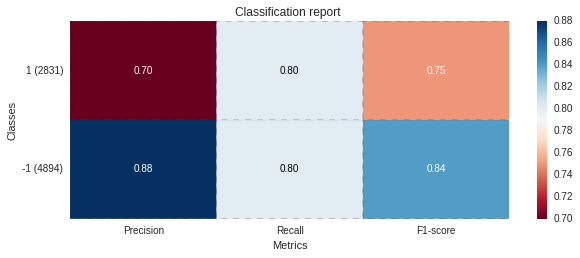

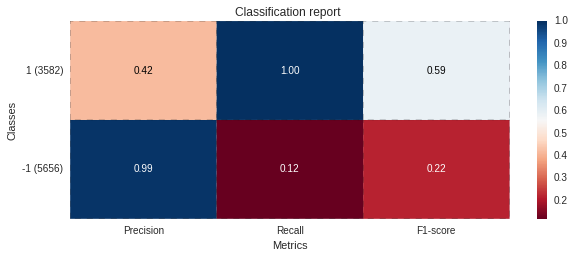

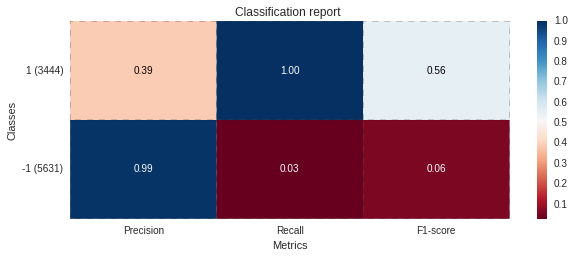

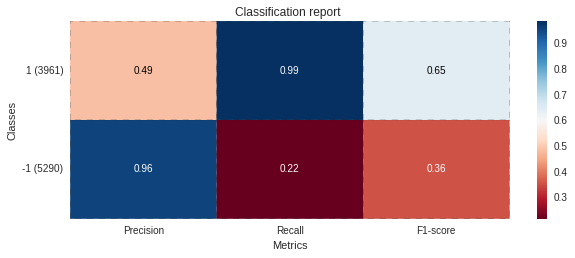

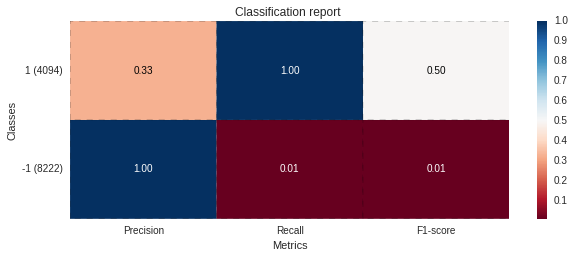

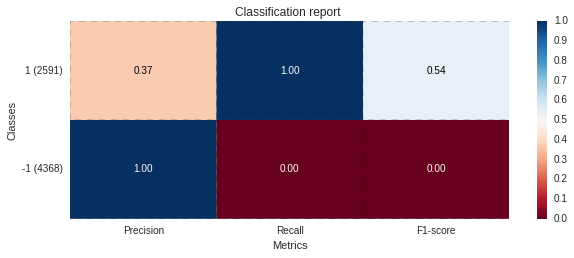

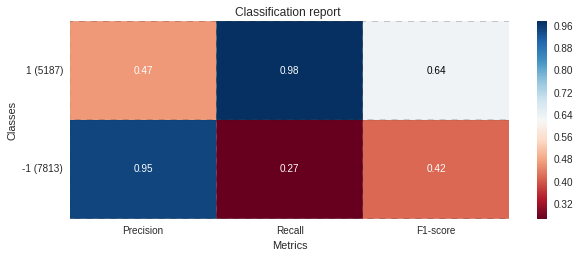

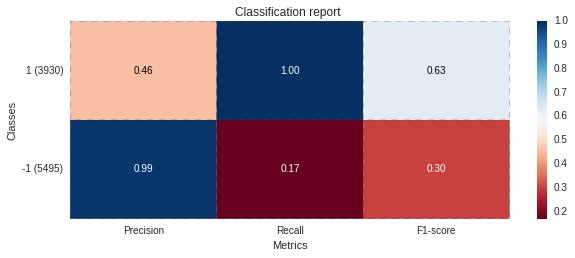

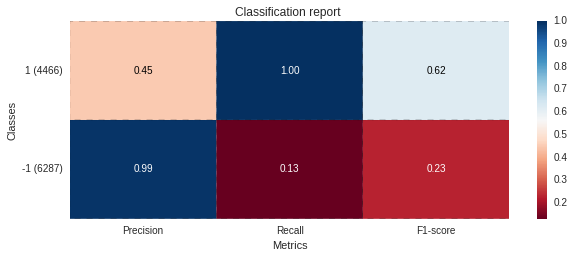

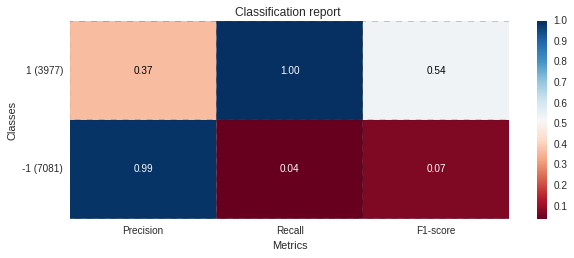

In [73]:
key_=0
fwd_dates = [i for i in _dates if i >_dates[key_]]
for key_, _date in enumerate(fwd_dates):
    y_cc=ticker_labelled_data_[_dates[key_]].iloc[:,6].dropna().astype(int).values
        # feature set
    _gamma = ticker_features_[_dates[key_]][2]
    _csi = ticker_features_[_dates[key_]][3]
    _info = ticker_features_[_dates[key_]][1]
    _fischer = ticker_features_[_dates[key_]][0]
    short_rolling = ticker_labelled_data_[_dates[key_]]['TradedPrice'].rolling(window=5).mean()
    long_rolling = ticker_labelled_data_[_dates[key_]]['TradedPrice'].rolling(window=15).mean()
    ma_signal = (long_rolling - short_rolling).fillna(0)

    df_features = pd.concat([_csi, _gamma, _fischer], axis=1)
    df_features['MA_signal'] = \
                ticker_labelled_data_[_dates[key_]]['TradedPrice'].rolling(window=15).mean() \
                - ticker_labelled_data_[_dates[key_]]['TradedPrice'].rolling(window=5).mean()
    df_features = df_features.dropna()
    X_, y = simpleInputs(df_features, y_cc)
    print("number of classes:", len(np.unique(y)))  # of classes

    # # Train a SVM classification model
    X_mms = mms.fit_transform(X_)
    y_predict = estimator.predict(X_mms) 
    print('Accuracy: %.2f' % accuracy_score(y_cc, y_predict))
    class_report= classification_report(y_cc, y_predict)
    prec_recall_list= precision_recall_fscore_support(y_cc, y_predict)
    plot_classification_report(class_report)

In [49]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    from itertools import izip
    pc.update_scalarmappable()
    ax = pc.get_axes()
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)


In [ ]:
X.shape[1]

In [54]:
def to_table(report): 
    report = report.splitlines() 
    res = [] 
    res.append(['']+report[0].split()) 
    for row in report[2:-2]: 
        res.append(row.split()) 
        lr = report[-1].split() 
        res.append([' '.join(lr[:3])]+lr[3:]) 
        return np.array(res)

In [57]:
pd.DataFrame(to_table(class_report))

,0,1,2,3,4
0,,precision,recall,f1-score,support
1,-1,0.99,0.04,0.07,7081
2,avg / total,0.76,0.38,0.24,11058


[0.99, 0.04, 0.07]
[0.37, 1.0, 0.54]
plotMat: [[0.99, 0.04, 0.07], [0.37, 1.0, 0.54]]
support: [7081, 3977]


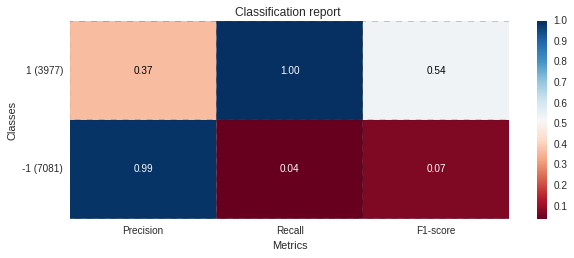

In [59]:
plot_classification_report(class_report)

In [80]:

import pandas as pd 

report = pd.DataFrame(list(precision_recall_fscore_support(y_cc, y_predict)), index=['Precision', 'Recall', 'F1-score', 'Support']).T # Now add the 'Avg/Total' row report.loc['Avg/Total', :] = precision_recall_fscore_support(y_true, y_test, average='weighted') report.loc['Avg/Total', 'Support'] = report['Support'].sum()


In [93]:

#Now add the 'Avg/Total' row 
report.loc['Avg/Total', :] = precision_recall_fscore_support(y_cc, y_predict, average='weighted') 

report.loc['Avg/Total', 'Support'] = report['Support'].sum()

type(report)
report.to_csv('/home/ak/Documents/'+'crap.csv')

In [94]:
os.getcwd()

'/home/ak/Documents/Research/QFPaper/aknotebooks'

In [95]:
pd.read_csv('/home/ak/Documents/'+'crap.csv')

,Unnamed: 0,Precision,Recall,F1-score,Support
0,0,0.985612,0.038695,0.074467,7081.0
1,1,0.368553,0.998994,0.538456,3977.0
2,Avg/Total,0.763687,0.384066,0.241340,11058.0


In [4]:
symbols_ftse= ['RB','CPI','AAL','CNA','VOD',
                'RSA','GKN','ECM','CRH','III','HSB','REL','PRU','RTO',
                'UU.','NG.','TSC','CEY','SBR','SDR','STAN','LAN']


In [52]:
ticker ='CPI'
ticker_predictions_path_ = os.path.join(_predictions_, ticker)
files_ =os.listdir(ticker_predictions_path_)
with open(_pkl_path + ticker+'_labelled_data.pickle', 'rb') as handle:
    ticker_labelled_data_ = pickle.load(handle)
_dates = ticker_labelled_data_.keys()   
files_[0]
file_form=ticker+'_'+_dates[3]+'_class_report.csv'
_L=len(_dates)

In [53]:
results={'precision:':np.empty((_L,1))
    }
for _index, _value in enumerate(_dates):
    file_form=ticker+'_'+_dates[3]+'_class_report.csv'
    _df_=pd.read_csv(os.path.join(ticker_predictions_path_,file_form))
    results[_index, :]=_df_['Precision'][1]

TypeError: unhashable type

In [70]:
_df_['Precision'].to_dict()

{0: 0.7078792958927075, 1: 0.6896551724137931, 2: 0.7024686555058001}

In [71]:
_df_.to_dict()

{'F1-score': {0: 0.8271302644466211,
  1: 0.05361930294906166,
  2: 0.5974791839523146},
 'Precision': {0: 0.7078792958927075,
  1: 0.6896551724137931,
  2: 0.7024686555058001},
 'Recall': {0: 0.9946996466431096,
  1: 0.027894002789400282,
  2: 0.7076604554865424},
 'Support': {0: 1698.0, 1: 717.0, 2: 2415.0},
 'Unnamed: 0': {0: '0', 1: '1', 2: 'Avg/Total'}}

In [63]:
for row in reader:
    print row

In [5]:
ticker ='PRU'
###############
with open(_pkl_path + ticker+'_features.pickle', 'rb') as handle:
    ticker_features_ = pickle.load(handle)
with open(_pkl_path + ticker+'_labelled_data.pickle', 'rb') as handle:
    ticker_labelled_data_ = pickle.load(handle)
_dates = ticker_labelled_data_.keys()   

In [6]:
ticker_labelled_data_[_dates[1]].columns.values

array(['TradedTime', 'TradedPrice', 'Duration', 'ReturnTradedPrice',
       'label_control_chart_q_40_q_70_window_15',
       'label_simple_ep_window_20_thresh_0.05',
       'label_simple_ep_window_20_thresh_0.00'], dtype=object)

In [17]:
_y_=ticker_labelled_data_[_dates[1]]['label_control_chart_q_40_q_70_window_15']

In [18]:
_y_.unique()

array([1, 0])

In [24]:
ticker_features_[_dates[1]][0]

,fischer_score_dlambda,fischer_score_dsigma,fischer_score_dweight
868,8.540967,-6.476134e+02,-1.018436
869,11.316914,-7.160528e+02,0.218641
870,11.316914,-7.459808e+02,1.452236
871,27.880614,-2.083298e+03,15.087762
872,28.040853,-2.119577e+03,16.405925
873,28.040853,-2.149505e+03,17.639520
874,34.845980,-3.496391e+03,31.402463
875,35.078581,-3.535538e+03,32.758817
876,35.078581,-3.565466e+03,33.992411
877,40.913189,-4.913520e+03,47.770914


In [37]:
folder =os.path.join(_pkl_path,'models','DMG/')

In [43]:
test='20171025_svm_clf.pkl'
svm_clf_ = os.path.join(folder,str(test))


In [44]:
with open(svm_clf_, 'rb') as handle:
    estimator = pickle.load(handle)

In [4]:
_features_path='/home/ak/Documents/Data/features_models/features/'

In [45]:
list_=os.listdir(_features_path)

list_

['SYNT_2states20170605_features.pickle',
 'SYNT_2states20170607_features.pickle',
 'SYNT_2states20170602_features.pickle',
 'SYNT_2states20170601_features.pickle',
 'SYNT_2states20170606_features.pickle']

In [63]:
file_=list_[3]
synt_file_ = os.path.join(_features_path, file_)
synt_file_

'/home/ak/Documents/Data/features_models/features/SYNT_2states20170601_features.pickle'

In [64]:
with open(synt_file_, 'rb') as handle:
    synt_features_ = pickle.load(handle)

In [70]:
synt_features_[0]

,fischer_score_dlambda,fischer_score_dsigma,fischer_score_dweight
0,33.005566,-16.989929,-1.132597
1,45.008896,-45.582068,-2.506641
2,51.391444,-66.676951,-3.747624
3,65.134834,-66.531405,0.427045
4,81.934755,-66.554550,5.241577
5,92.254657,-80.434892,3.905963
6,85.494314,-75.340446,2.773064
7,101.641797,-106.096422,1.339792
8,114.525390,-105.457900,6.421884
9,130.764959,-105.619878,11.174159


In [75]:
a=synt_features_[1]
unique, counts = np.unique(a, return_counts=True)

In [74]:
a.isnull().sum()

fischer_score_dlambda    0
fischer_score_dsigma     0
fischer_score_dweight    0
dtype: int64

In [26]:
a.shape

(4876, 6)